First, lets reconstruct dimuon z mass.
reaplying previous code. Using the following criteria to select two well-defined and isolated muons.

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import uproot_methods
import ROOT
import boost_histogram as bh
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.20/06


In [95]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']
#file=uproot.open('~/Downloads/FE9779A1-B793-2644-9A14-3E105B03B488.root')['Events']
# !!!!!!!!! Muon_pfRelIso03_chg -> chargedhadroniso
muon=file.arrays(['Muon_pt','Muon_eta','Muon_phi','Muon_mass',
                  'Muon_charge','Muon_isGlobal','Muon_genPartIdx',
                  'GenPart_pt', 'GenPart_eta', 'GenPart_phi', 
                  'GenPart_mass', 'Muon_pfRelIso03_chg'], namedecode='utf-8')

In [79]:
gen=file.arrays(['GenPart_pt', 'GenPart_eta', 'GenPart_phi', 'GenPart_mass'], namedecode='utf-8')

In [96]:
muons=ak.JaggedArray.zip(pt=muon['Muon_pt'], eta=muon['Muon_eta'], 
                         phi=muon['Muon_phi'], mass=muon['Muon_mass'], 
                         charge=muon['Muon_charge'], genidx=muon['Muon_genPartIdx'] )
gens=ak.JaggedArray.zip(pt=muon['GenPart_pt'], eta=muon['GenPart_eta'],
                              phi=muon['GenPart_phi'], mass=muon['GenPart_mass'],)

In [97]:
muon_mask=(muon['Muon_genPartIdx']!=-1)& (muon['Muon_isGlobal']==1)& (muon['Muon_pt']>20)& (abs(muon['Muon_eta'])<2.4)& (muon['Muon_pfRelIso03_chg']<0.15)

In [98]:
muons_good=muons[muon_mask]

In [99]:
(muon_mask.sum()==2).sum()

56141

In [100]:
(muon_mask.sum()==3).sum()

5

In [101]:
(muon_mask.sum()==1).sum()

43545

Note here if we write a for loop, then 42958 events are don't woth to loop over it. By using columnar method, time is saved.

In [102]:
(muon_mask.sum()==4).sum()

1

In [103]:
(muon_mask.sum()==5).sum()

0

In [104]:
(muon_mask.sum()==6).sum()

0

In [105]:
two_good_muons=muons_good[muon_mask.sum()==2]

In [106]:
two_good_muons.charge

<JaggedArray [[1 -1] [1 -1] [1 -1] ... [-1 1] [-1 1] [-1 1]] at 0x7fc6b678d110>

Lets make sure muons in eaach events have opposite charge

In [107]:
opposite_sign_muon_mask=(two_good_muons.charge[:,0]!=two_good_muons.charge[:,1])

In [108]:
two_opposite_good_muons=two_good_muons[opposite_sign_muon_mask]
opposite_sign_muon_mask.sum()

56135

In [109]:
two_muon_p4=uproot_methods.TLorentzVectorArray.from_ptetaphim(two_opposite_good_muons.pt, two_opposite_good_muons.eta,
                                                              two_opposite_good_muons.phi, two_opposite_good_muons.mass)

In [110]:
dimuon_p4=two_muon_p4[:,0]+two_muon_p4[:,1]
#dimuon_p4.mass

In [111]:
dimuon_mass_mask=(dimuon_p4.mass>70)&(dimuon_p4.mass<110)

Text(0, 0.5, 'Events')

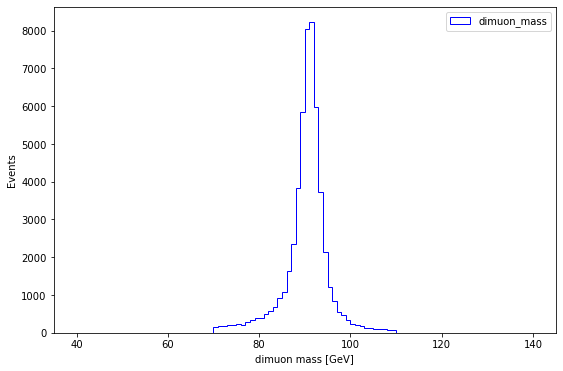

In [112]:
plt.figure(figsize=(9,6))
plt.hist(dimuon_p4.mass[dimuon_mass_mask], bins=100, range=[40,140], histtype='step', color='blue', label='dimuon_mass')
plt.legend()
plt.xlabel('dimuon mass [GeV]')
plt.ylabel('Events')

Now lets get their corresponding genpart and gen dimuon mass.

In [113]:
idx=two_opposite_good_muons.genidx
pf_gen_muons=((gens[muon_mask.sum()==2])[opposite_sign_muon_mask])[idx]

In [114]:
two_gen_muon_p4=uproot_methods.TLorentzVectorArray.from_ptetaphim(pf_gen_muons.pt, pf_gen_muons.eta,
                                                                  pf_gen_muons.phi, pf_gen_muons.mass)

In [115]:
gen_dimuon_p4=two_gen_muon_p4[:,0]+two_gen_muon_p4[:,1]

Text(0, 0.5, 'Events')

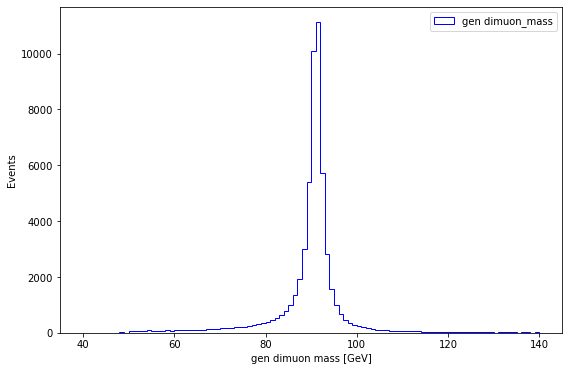

In [116]:
plt.figure(figsize=(9,6))
n=plt.hist(gen_dimuon_p4.mass, bins=100, range=[40,140], histtype='step', color='blue', label='gen dimuon_mass')
plt.legend()
plt.xlabel('gen dimuon mass [GeV]')
plt.ylabel('Events')

In [117]:
n

(array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 1.1000e+01, 7.0000e+00,
        6.5000e+01, 7.1000e+01, 7.4000e+01, 6.8000e+01, 8.6000e+01,
        7.8000e+01, 6.7000e+01, 7.8000e+01, 9.2000e+01, 8.2000e+01,
        1.1300e+02, 9.0000e+01, 9.0000e+01, 1.0900e+02, 1.1400e+02,
        1.1200e+02, 1.1200e+02, 1.3400e+02, 1.3600e+02, 1.5200e+02,
        1.6100e+02, 1.6200e+02, 1.7900e+02, 1.9500e+02, 2.0300e+02,
        1.9700e+02, 2.3200e+02, 2.8700e+02, 3.0900e+02, 3.4600e+02,
        3.8800e+02, 4.7000e+02, 5.2500e+02, 6.2500e+02, 7.7700e+02,
        9.7900e+02, 1.3410e+03, 1.9170e+03, 3.0120e+03, 5.4140e+03,
        1.0078e+04, 1.1123e+04, 5.7290e+03, 2.8100e+03, 1.5800e+03,
        9.8800e+02, 6.6400e+02, 4.5800e+02, 3.5200e+02, 2.8100e+02,
        2.4700e+02, 2.1600e+02, 1.7900e+02, 1.2300e+02, 1.0800e+02,
        1.0100e+02, 9.0000e+01, 8.1000e+01, 5.7000e+01, 6.4000e+01,
        7.4000e+01, 4.7000e+01, 5.1000e+01, 5.10

 FCN=196.207 FROM MIGRAD    STATUS=CONVERGED     191 CALLS         192 TOTAL
                     EDM=5.6932e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.64944e+04   1.33543e+02   8.67889e-01   1.06976e-08
   2  p1           9.10242e+01   8.68310e-03   5.90962e-05  -3.00672e-04
   3  p2           2.79677e+00   2.24718e-02   1.45094e-04   4.06291e-05


Warning in <TROOT::Append>: Replacing existing TH1: h_RecDiMuonM (Potential memory leak).


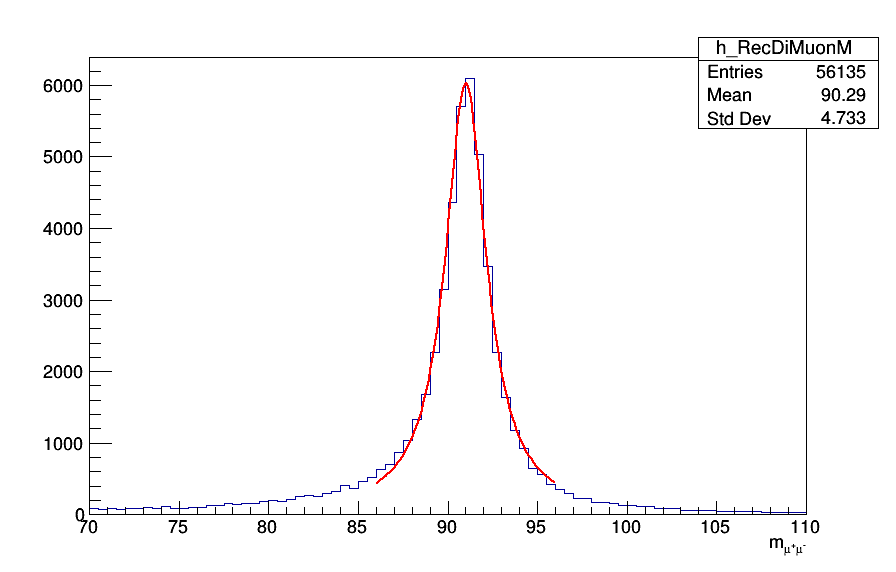

In [186]:
c6 = ROOT.TCanvas("gendimuonmass","",900,600)
h_GenDiMuonM = ROOT.TH1F("h_GenDiMuonM",";m_{#mu^{+}#mu^{-}};",80,70,110);
for m in gen_dimuon_p4.mass:
    h_GenDiMuonM.Fill(m)
h_GenDiMuonM.Draw()
c6.Draw()
f2 = ROOT.TF1("f2", "[0]*TMath::BreitWigner(x, [1], [2])", 86., 96.);
f2.SetParameter(1, 91.1876);
f2.SetParameter(2, 2.4952);
h_GenDiMuonM.Fit("f2", "", "", 86., 96.);
c6.Draw()

 FCN=95.9344 FROM MIGRAD    STATUS=CONVERGED     315 CALLS         316 TOTAL
                     EDM=1.73464e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.73415e+04   2.27242e+02  -2.00909e-01   1.88704e-06
   2  p1           9.09572e+01   1.28225e-02  -1.51337e-05  -2.19288e-02
   3  p2           8.81215e-01   6.88167e-02   4.10168e-04   2.53605e-02
   4  p3           3.41581e+00   1.05889e-01  -5.61062e-04   1.08647e-02


Warning in <TROOT::Append>: Replacing existing TH1: h_RecDiMuonM (Potential memory leak).


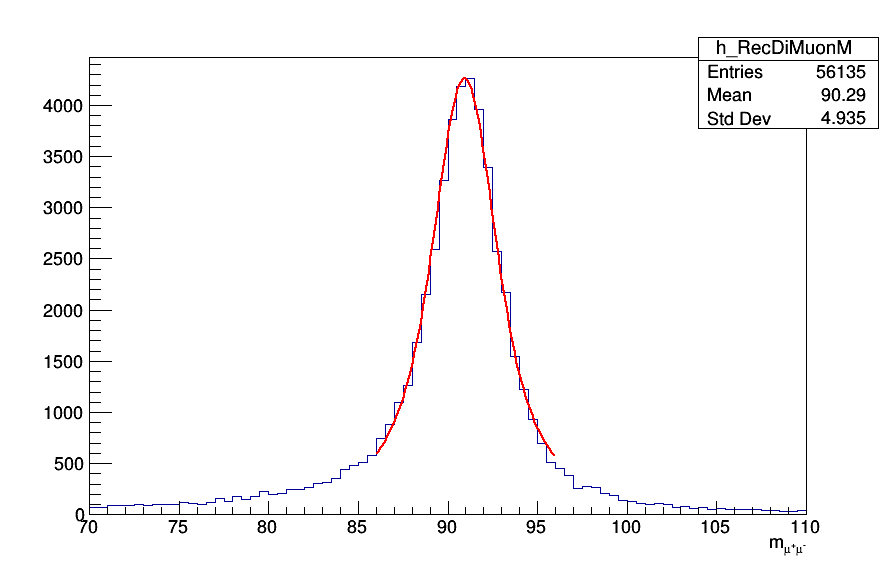

In [187]:
c6 = ROOT.TCanvas("recdimuonmass","",900,600)
h_RecDiMuonM = ROOT.TH1F("h_RecDiMuonM",";m_{#mu^{+}#mu^{-}};",80,70,110)
for m in dimuon_p4.mass:
    h_RecDiMuonM.Fill(m)
h_RecDiMuonM.Draw()
c6.Draw()
f1 = ROOT.TF1("f1", "[0]*TMath::Voigt(x-[1], [2], [3])", 86., 96.);
f1.SetParameter(1, 91.1876);
f1.SetParameter(3, 2.4952);
h_RecDiMuonM.Fit("f1", "", "", 86., 96.);
c6.Draw()

Now lets plot some profile histogram

In [119]:
prof_MuPlusPhiVsDiMuonM=ROOT.TProfile("prof_MuPlusPhivsDiMuonM","#mu^{+} #phi vs m_{#mu^{+}#mu^{-}};Reco muon(+) #phi[rad]; Z peak position [GeV/c^2]",16,-3.14,3.14,88,93)

Warning in <TROOT::Append>: Replacing existing TH1: prof_MuPlusPhivsDiMuonM (Potential memory leak).


In [120]:
mup_phi=two_opposite_good_muons.phi[two_opposite_good_muons.charge>0].flatten()

In [121]:
for phi, m in zip(mup_phi[dimuon_mass_mask], (dimuon_p4.mass)[dimuon_mass_mask]):
   prof_MuPlusPhiVsDiMuonM.Fill(phi, m, 1)

In [122]:
c1 = ROOT.TCanvas("mupphidimum","",900,600)
prof_MuPlusPhiVsDiMuonM.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mupphidimum


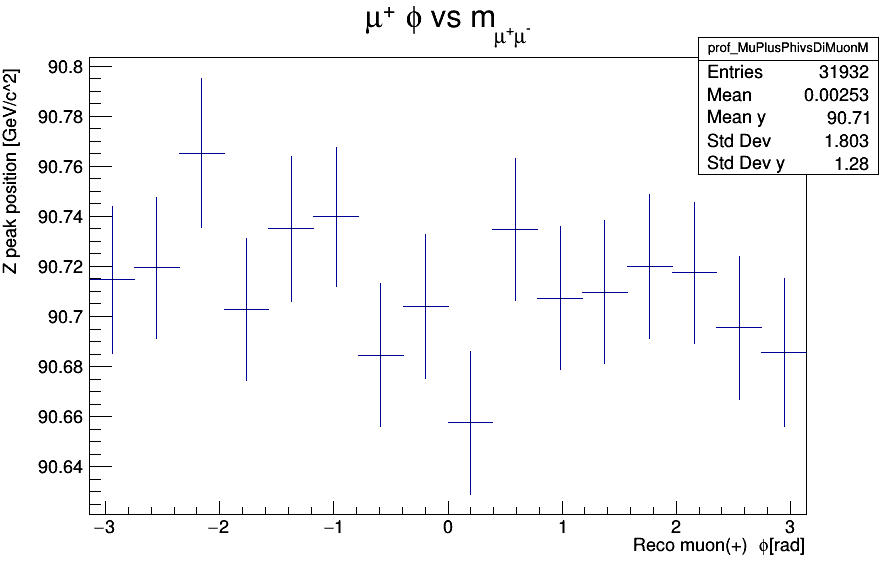

In [123]:
c1.Draw()

In [124]:
mum_phi=two_opposite_good_muons.phi[two_opposite_good_muons.charge<0].flatten()
prof_MuMinusPhivsDiMuonM = ROOT.TProfile("prof_MuMinusPhivsDiMuonM","#mu^{-} #phi vs m_{#mu^{+}#mu^{-}};Reco muon(-) #phi[rad];Z peak position [GeV/c^2]",16,-3.14,3.14,88,93)

Warning in <TROOT::Append>: Replacing existing TH1: prof_MuMinusPhivsDiMuonM (Potential memory leak).


In [125]:
for phi, m in zip(mum_phi[dimuon_mass_mask], (dimuon_p4.mass)[dimuon_mass_mask]):
   prof_MuMinusPhivsDiMuonM.Fill(phi, m, 1)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mumphidimum


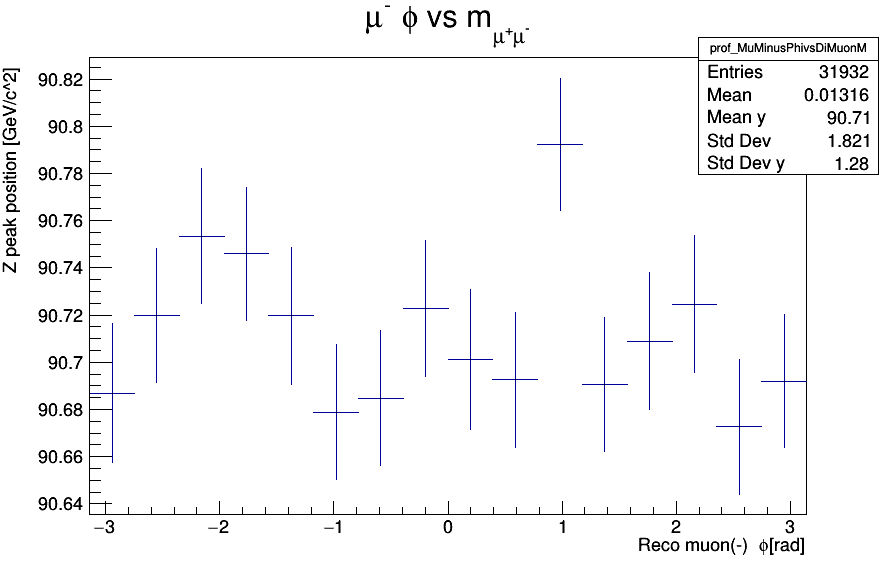

In [126]:
c2 = ROOT.TCanvas("mumphidimum","",900,600)
prof_MuMinusPhivsDiMuonM.Draw()
c2.Draw()

In [127]:
prof_MuEtavsDiMuonM = ROOT.TProfile("prof_MuEtavsDiMuonM","Muon #eta vs m_{#mu^{+}#mu^{-}};Reco Muon #eta; Z peak position [GeV/c^2]",50,-2.4,2.4,88,93)

Warning in <TROOT::Append>: Replacing existing TH1: prof_MuEtavsDiMuonM (Potential memory leak).


In [128]:
for eta1, eta2, m in zip(two_opposite_good_muons[dimuon_mass_mask].eta[:,0],
                         two_opposite_good_muons[dimuon_mass_mask].eta[:,0],
                         dimuon_p4.mass[dimuon_mass_mask]):
    prof_MuEtavsDiMuonM.Fill(eta1, m, 1)
    prof_MuEtavsDiMuonM.Fill(eta2, m, 1)
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: muetadimum


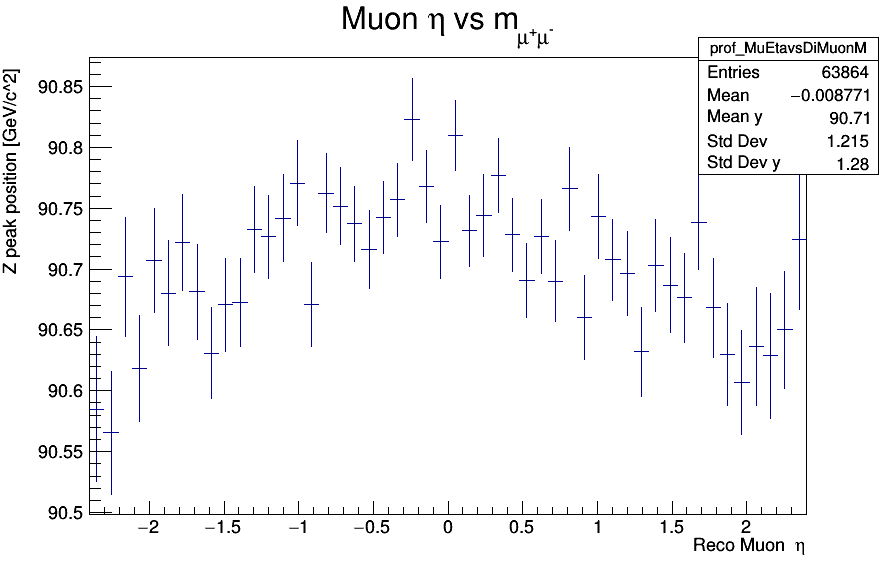

In [129]:
c3 = ROOT.TCanvas("muetadimum","",900,600)
prof_MuEtavsDiMuonM.Draw()
c3.Draw()

Step 3: Investigate the muon transverse momentum resolution

Now we will study the muon transverse momentum resolution. We will consider distributions of the transverse momentum residuals, defined as R(1/pT) = (1/pTREC – 1/pTGEN)/(1/pTGEN). In the ideal case, the distribution of the residuals is expected to be Gaussian and its standard deviation is the pT resolution. Likewise, we can define the dimuon invariant mass residuals as R(M) = (MREC – MGEN)/MGEN, and the standard deviation of the R(M) distribution defines the mass resolution.

We will create the following histograms:

1D histogram of the muon transverse momentum residuals R(1/pT): A histogram (h_MupTRes) of the muon transverse momentum residual using the PAT muons and GEN muons. Fit this distribution to a Gaussian function using the FitPanel. The fit parameter sigma gives the muon transverse momentum resolution in the chosen pT range.
1D histogram of the dimuon invariant mass residuals R(M): A histogram (h_MassRes) for the invariant mass resolution residual, which is defined as (Mrec - Mgen )/Mgen. Fit this distribution to a Gaussian.
Profile histograms (prof_MupTvspTRes and prof_MuEtavspTRes) of muon transverse momentum residuals as a function of muon pT and η.

Text(0, 0.5, 'Events')

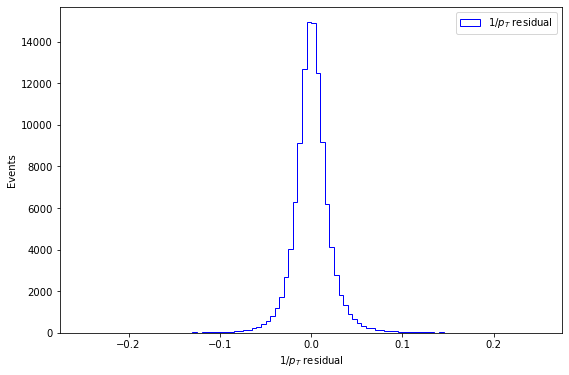

In [152]:
pt_res=two_gen_muon_p4.pt.flatten()/two_opposite_good_muons.pt.flatten()-1
plt.figure(figsize=(9,6))
plt.hist(pt_res, bins=100, range=[-0.25,0.25], histtype='step', color='blue', label='$1/p_T$ residual')
plt.legend()
plt.xlabel('$1/p_T$ residual')
plt.ylabel('Events')

In [131]:
mass_res=dimuon_p4.mass.flatten()/gen_dimuon_p4.mass.flatten()-1

Text(0, 0.5, 'Events')

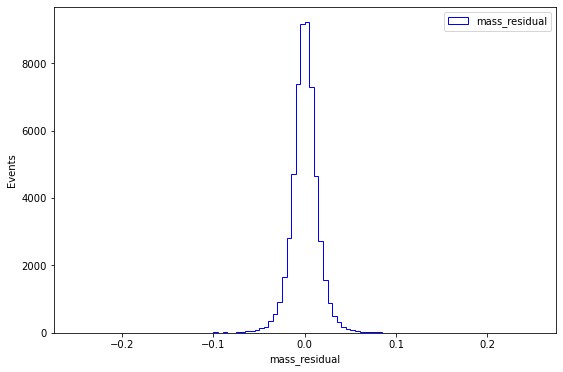

In [153]:
plt.figure(figsize=(9,6))
plt.hist(mass_res, bins=100, range=[-0.25,0.25], histtype='step', color='blue', label='mass_residual')
plt.legend()
plt.xlabel('mass_residual')
plt.ylabel('Events')

Warning in <TROOT::Append>: Replacing existing TH1: prof_MuEtavspTRes (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: muetavsptres


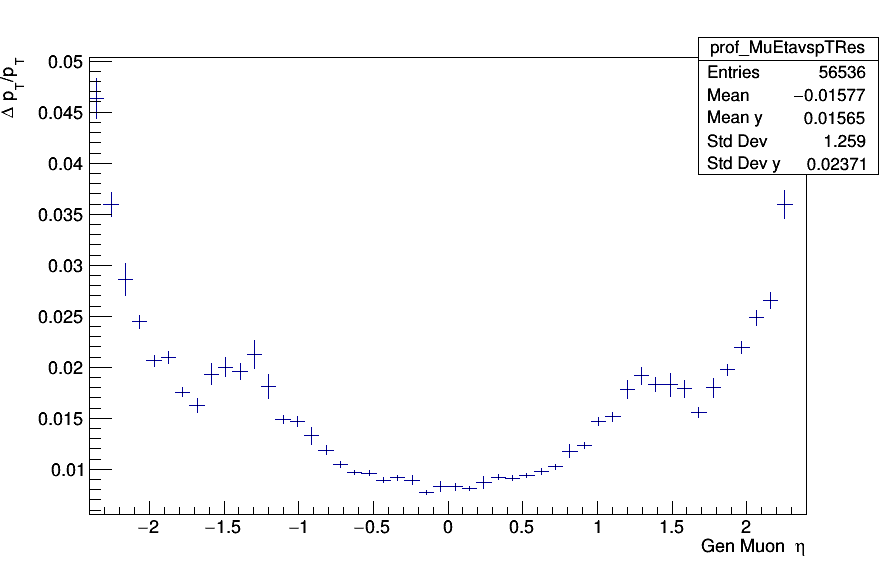

In [134]:
prof_MuEtavspTRes = ROOT.TProfile("prof_MuEtavspTRes",";Gen Muon #eta;#Delta p_{T}/p_{T}",50,-2.4,2.4,0,1)
for ptres, eta in zip(pt_res, two_gen_muon_p4.eta.flatten()):
    prof_MuEtavspTRes.Fill(eta, ptres, 1)
c4 = ROOT.TCanvas("muetavsptres","",900,600)
prof_MuEtavspTRes.Draw()
c4.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: prof_MupTvspTRes (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: muptvsptres


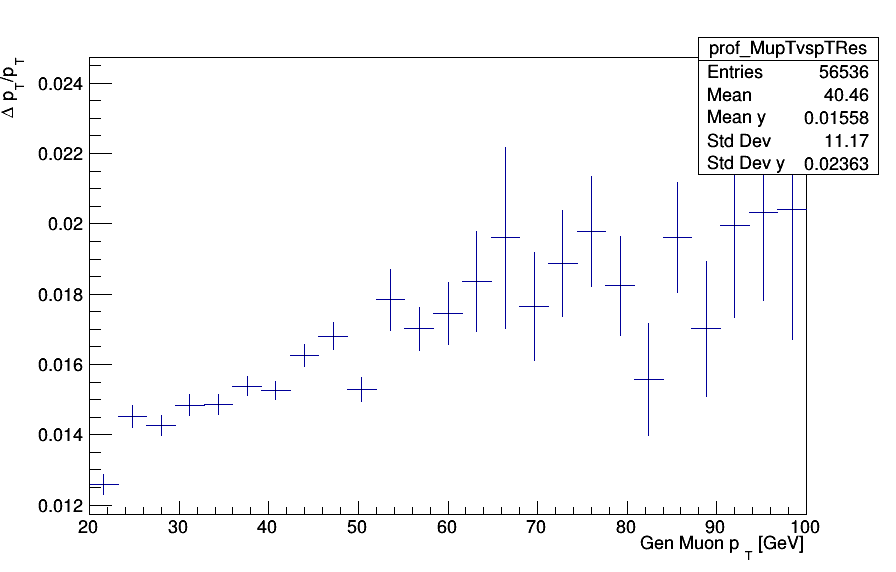

In [156]:
prof_MupTvspTRes = ROOT.TProfile("prof_MupTvspTRes",";Gen Muon p_{T} [GeV];#Delta p_{T}/p_{T}",25,20,100,0,1)
for ptres, pt in zip(pt_res, two_gen_muon_p4.pt.flatten()):
    prof_MupTvspTRes.Fill(pt, ptres, 1)
c5 = ROOT.TCanvas("muptvsptres","",900,600)
prof_MupTvspTRes.Draw()
c5.Draw()

In [ ]:
hm = bh.Histogram(
    bh.axis.Regular(14, -3.5, 3.5, underflow=False, overflow=False),
    storage=bh.storage.Mean(),
)

hm.fill(mup_phi[dimuon_mass_mask], sample=(dimuon_p4.mass)[dimuon_mass_mask])

In [ ]:
print(np.sqrt(hm.view().variance),
hm.axes[0].centers,
hm.view().value)

In [ ]:
# Plot
#fig, ax = plt.subplots()
#ax.hist2d(mup_phi, dimuon_p4.mass, bins=100, cmap="gray_r")
plt.figure(figsize=(16,12))
plt.ylabel('Events')
plt.yticks(np.arange(70,110,40))
plt.errorbar(hm.axes[0].centers, hm.view().value,
            yerr=np.sqrt(hm.view().variance),
            fmt="ro")
plt.yticks(np.arange(70,110,1))

In [ ]:
plt.figure(figsize=(16,12))
plt.hist2d(mup_phi, dimuon_p4.mass, bins=[1000,5000])
plt.yticks(np.arange(80,100,1))
plt.ylim((80, 100)) 
